## Exploratory Data Analysis

In [29]:
# Import Libraries:

import pandas as pd
import numpy as py
import time, math 
import tmdbsimple as tmdb

In [30]:
# Import JSON 

import json
with open('/Users/jnate/.secret/tmdb_api.json', 'r') as f:
    login = json.load(f)
## Display the keys of the loaded dict:
login.keys()

dict_keys(['api-key'])

Each year should be saved as a separate .csv.gz file

In [31]:
# Load API key:

tmdb.API_KEY =  login['api-key']

In [32]:
# Make a movie object using the .Movies function from tmdb
movie = tmdb.Movies(603)

In [33]:
# Movie ofbjects have a .info dictionary
info = movie.info()
info

{'adult': False,
 'backdrop_path': '/y9wuhlrqSHvhTLNVNwKMKe6HZzY.jpg',
 'belongs_to_collection': {'id': 2344,
  'name': 'The Matrix Collection',
  'poster_path': '/bV9qTVHTVf0gkW0j7p7M0ILD4pG.jpg',
  'backdrop_path': '/bRm2DEgUiYciDw3myHuYFInD7la.jpg'},
 'budget': 63000000,
 'genres': [{'id': 28, 'name': 'Action'},
  {'id': 878, 'name': 'Science Fiction'}],
 'homepage': 'http://www.warnerbros.com/matrix',
 'id': 603,
 'imdb_id': 'tt0133093',
 'original_language': 'en',
 'original_title': 'The Matrix',
 'overview': 'Set in the 22nd century, The Matrix tells the story of a computer hacker who joins a group of underground insurgents fighting the vast and powerful computers who now rule the earth.',
 'popularity': 65.366,
 'poster_path': '/f89U3ADr1oiB1s9GkdPOEpXUk5H.jpg',
 'production_companies': [{'id': 79,
   'logo_path': '/tpFpsqbleCzEE2p5EgvUq6ozfCA.png',
   'name': 'Village Roadshow Pictures',
   'origin_country': 'US'},
  {'id': 174,
   'logo_path': '/IuAlhI9eVC9Z8UQWOIDdWRKSEJ.png'

In [34]:
info['budget']

63000000

In [35]:
info['revenue']

463517383

In [36]:
# info() includes "imbdb_id" which we can use to match with 
# our existing data frame of movies:

info['imdb_id']

'tt0133093'

Your stakeholder wants you to extract the budget, revenue, and MPAA Rating (G/PG/PG-13/R), which is also called "Certification".

As a proof-of-concept, they requested you perform a test extraction of movies that started in 2000 or 2001

In [37]:
# load csv files from part I:

basics = pd.read_csv('C:\\Users\\jnate\\OneDrive\\Documents\\Data Enrichment\\Project-3\\Data\\title_basics.csv.gz')

basics.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0035423,movie,Kate & Leopold,Kate & Leopold,0,2001-01-01,NaN,118,"Comedy,Fantasy,Romance"
1,tt0062336,movie,The Tango of the Widower and Its Distorting Mi...,El Tango del Viudo y Su Espejo Deformante,0,2020-01-01,NaN,70,Drama
2,tt0069049,movie,The Other Side of the Wind,The Other Side of the Wind,0,2018-01-01,NaN,122,Drama
3,tt0079644,movie,November 1828,November 1828,0,2001-01-01,NaN,140,"Drama,War"
4,tt0088751,movie,The Naked Monster,The Naked Monster,0,2005-01-01,NaN,100,"Comedy,Horror,Sci-Fi"


In [ ]:
# load csv files from part I:

# basics = pd.read_csv('C:\\Users\\jnate\\OneDrive\\Documents\\Data Enrichment\\Project-3\\Data\\title_basics.csv.gz')

# basics.head()

In [38]:
basics.shape

(140788, 9)

In [39]:
basics['startYear'].value_counts()

2018-01-01    9539
2017-01-01    9372
2019-01-01    9210
2016-01-01    8983
2015-01-01    8535
2014-01-01    8140
2021-01-01    7870
2013-01-01    7746
2020-01-01    7343
2012-01-01    7260
2011-01-01    6737
2010-01-01    6328
2009-01-01    5931
2008-01-01    5167
2007-01-01    4581
2022-01-01    4383
2006-01-01    4350
2005-01-01    3878
2004-01-01    3488
2003-01-01    3207
2002-01-01    2963
2001-01-01    2837
2000-01-01    2707
2023-01-01     233
Name: startYear, dtype: int64

In [40]:
# Save API calls to a previously created folder called Dat:

import os, time
from tqdm.notebook import tqdm_notebook

FOLDER = "Data/"
os.makedirs(FOLDER, exist_ok=True)
os.listdir(FOLDER)

['.ipynb_checkpoints',
 'akas.csv.gz',
 'ratings.csv.gz',
 'title_basics.csv.gz',
 'tmbd_api_results_2000.json',
 'tmbd_api_results_2001.json',
 'tmdb_api_results_2000.json',
 'tmdb_api_results_2001.json']

In [51]:
# Write a definition for movie ratings: 

def get_movie_rating(movie_id):
# Get movie object for the current id:

    movie = tmdb.Movies(movie_id)

    # Save the .info .releases dictionaries:

    info = movie.info()
    releases = movie.releases()

    # Loop through coutnries in releases:

    for c in releases['countries']:
        
        # If the country abbreviation is US
        if c['iso_3166_1'] =='US':
            
            # Save a "certification" key in the info dict with the certification:
            info['certification'] = c['certification']
    return info

In [52]:
# Function to append new results to the existing JSON file:

def write_json(new_data, filename):
    """Adapted from: https://www.geeksforgeeks.org/append-to-json-file-using-python/"""
    with open(filename, 'r+') as file:
        
        # Load existing data into a dictionary:
        file_data = json.load(file)
        
        # Choose extend or append:
        if (type(new_data)== list) & (type(file_data) == list):
            file_data.extend(new_data)
        else:
            file_data.append(new_data)
            
        # Set file's current position at offset:
        file.seek(0)
        
        # convert back to json.
        json.dump(file_data, file)

In [55]:
YEARS_TO_GET = [2000,2001]


# Start of OUTER loop:

for YEAR in tqdm_notebook(YEARS_TO_GET, desc='YEARS',
                          position=0):
    # Defining the JSON file to store results for year
    JSON_FILE = f'{FOLDER}tmdb_api_results_{YEAR}.json'

    # Check if file exists:
    file_exists = os.path.isfile(JSON_FILE)


    # If file does not exist create it:
    if file_exists == False:
        
    # save an empty dict with just "imdb_id" to the new json file:
        with open(JSON_FILE,'w') as f:
            json.dump([{'imdb_id':0}],f)



    # Saving new year as the current df:
    df = basics.loc[ basics['startYear']==YEAR].copy()
    
    # Saving movie ids to list:
    movie_ids = df['tconst'].copy()#.to_list()


    # Load existing data from json into a dataframe called "previous_df":
    previous_df = pd.read_json(JSON_FILE)


    # filter out any ids that are already in the JSON_FILE:
    movie_ids_to_get = movie_ids[~movie_ids.isin(previous_df['imdb_id'])]


    # Get index and movie id from list:
    # INNER Loop:
    
    for movie_id in tqdm_notebook(movie_ids_to_get,
                                  desc=f'Movies from {YEAR}',
                                  position=1,
                                  leave=True):
        # Attempt to retrieve then data for the movie id
        try:
            temp = get_movie_rating(movie_id)  #This uses your pre-made function
            # Append/extend results to existing file using a pre-made function
            write_json(temp,JSON_FILE)
            # Short 20 ms sleep to prevent overwhelming server
            time.sleep(0.02)

        # If it fails,  make a dict with just the id and None for certification.
        except Exception as e:
            continue


    
    final_year_df = pd.read_json(JSON_FILE)
    
    csv_fname = f"{FOLDER}final_tmdb_data_{YEAR}.csv.gz"
    final_year_df.to_csv(csv_fname, compression="gzip", index=False)

YEARS:   0%|          | 0/2 [00:00<?, ?it/s]

Movies from 2000: 0it [00:00, ?it/s]

Movies from 2001: 0it [00:00, ?it/s]

# Exploratory Data Analysis

In [93]:
# Load JSON files:

with open('Data\\tmdb_api_results_2000.json') as y1:
    jsonfile2 = json.load(y1)

with open('Data\\tmdb_api_results_2001.json') as y2:
    jsonfile3 = json.load(y2)

In [94]:
# Convert separate years to pandas DataFrames:

year2000 = pd.DataFrame(jsonfile2)
year2000.head()

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tt0113026,False,/vMFs7nw6P0bIV1jDsQpxAieAVnH.jpg,None,10000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",,62127.0,en,The Fantasticks,...,0.0,86.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Try to remember the first time magic happened,The Fantasticks,False,5.4,21.0,
2,tt0113092,False,None,None,0.0,"[{'id': 878, 'name': 'Science Fiction'}]",,110977.0,en,For the Cause,...,0.0,100.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,The ultimate showdown on a forbidden planet.,For the Cause,False,4.4,7.0,
3,tt0116391,False,None,None,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",,442869.0,hi,Gang,...,0.0,152.0,"[{'english_name': 'Hindi', 'iso_639_1': 'hi', ...",Released,,Gang,False,0.0,0.0,NaN
4,tt0118694,False,/n4GJFGzsc7NinI1VeGDXIcQjtU2.jpg,None,150000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",http://www.wkw-inthemoodforlove.com/,843.0,cn,花樣年華,...,12854953.0,99.0,"[{'english_name': 'Cantonese', 'iso_639_1': 'c...",Released,"Feel the heat, keep the feeling burning, let t...",In the Mood for Love,False,8.1,1868.0,PG


In [95]:
# Convert separate years to pandas DataFrames:

year2001 = pd.DataFrame(jsonfile3)
year2001.head()

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tt0035423,False,/hfeiSfWYujh6MKhtGTXyK3DD4nN.jpg,None,48000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 14, 'nam...",,11232.0,en,Kate & Leopold,...,76019048.0,118.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,If they lived in the same century they'd be pe...,Kate & Leopold,False,6.3,1106.0,PG-13
2,tt0114447,False,None,None,0.0,"[{'id': 53, 'name': 'Thriller'}, {'id': 28, 'n...",,151007.0,en,The Silent Force,...,0.0,90.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,They left him for dead... They should have fin...,The Silent Force,False,5.0,3.0,NaN
3,tt0118589,False,/bLntSfsqUheiUirdV9Ts8znqsTM.jpg,None,22000000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",,10696.0,en,Glitter,...,5271666.0,104.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,"In music she found her dream, her love, herself.",Glitter,False,4.6,115.0,PG-13
4,tt0118652,False,/mWxJEFRMvkG4UItYJkRDMgWQ08Y.jpg,None,1000000.0,"[{'id': 9648, 'name': 'Mystery'}, {'id': 27, '...",,17140.0,en,The Attic Expeditions,...,0.0,100.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,His search for peace of mind... will leave his...,The Attic Expeditions,False,5.1,28.0,R


In [132]:
# Combine / Concatinate separate DataFrames: 

combined = [year2000, year2001]

finalyears = pd.concat(combined)

finalyears.head()

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tt0113026,False,/vMFs7nw6P0bIV1jDsQpxAieAVnH.jpg,None,10000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",,62127.0,en,The Fantasticks,...,0.0,86.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Try to remember the first time magic happened,The Fantasticks,False,5.4,21.0,
2,tt0113092,False,None,None,0.0,"[{'id': 878, 'name': 'Science Fiction'}]",,110977.0,en,For the Cause,...,0.0,100.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,The ultimate showdown on a forbidden planet.,For the Cause,False,4.4,7.0,
3,tt0116391,False,None,None,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",,442869.0,hi,Gang,...,0.0,152.0,"[{'english_name': 'Hindi', 'iso_639_1': 'hi', ...",Released,,Gang,False,0.0,0.0,NaN
4,tt0118694,False,/n4GJFGzsc7NinI1VeGDXIcQjtU2.jpg,None,150000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",http://www.wkw-inthemoodforlove.com/,843.0,cn,花樣年華,...,12854953.0,99.0,"[{'english_name': 'Cantonese', 'iso_639_1': 'c...",Released,"Feel the heat, keep the feeling burning, let t...",In the Mood for Love,False,8.1,1868.0,PG


### ***How many movies had at least some valid financial information (values > 0 for budget OR revenue)?***

In [133]:
# Check for missing values:

finalyears.isna().sum()

imdb_id                     0
adult                       2
backdrop_path            1235
belongs_to_collection    2286
budget                      2
genres                      2
homepage                  169
id                          2
original_language           2
original_title              2
overview                    2
popularity                  2
poster_path               314
production_companies        2
production_countries        2
release_date                2
revenue                     2
runtime                    47
spoken_languages            2
status                      2
tagline                     2
title                       2
video                       2
vote_average                2
vote_count                  2
certification             839
dtype: int64

In [135]:
# Excluding titles with a budget of 0. 

budget = finalyears.loc[finalyears['budget'].copy() != 0]

finalyears = budget

In [136]:
# Excluding titles with 0 revenue:

revenue = finalyears.loc[finalyears['revenue'].copy() != 0]

finalyears = revenue

In [137]:
finalyears.dropna(inplace = True)

finalyears.head()

C:\Users\jnate\anaconda3\envs\dojo-env\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
13,tt0120630,False,/t7aJ7hqsMLEoqBJk7yAXxcAVvcz.jpg,"{'id': 718551, 'name': 'Chicken Run Collection...",45000000.0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",,7443.0,en,Chicken Run,...,224834564.0,84.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,This ain't no chick flick. It's poultry in mot...,Chicken Run,False,6.7,3997.0,G
17,tt0120755,False,/8XaohdSqoBEWHhW40q2VTdMBrV0.jpg,"{'id': 87359, 'name': 'Mission: Impossible Col...",125000000.0,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",,955.0,en,Mission: Impossible II,...,546388105.0,123.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Expect the impossible again.,Mission: Impossible II,False,6.1,5279.0,PG-13
18,tt0120903,False,/u4gOTZLplCbP3IgcYcZ7e1zgOAo.jpg,"{'id': 748, 'name': 'X-Men Collection', 'poste...",75000000.0,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",,36657.0,en,X-Men,...,296339527.0,104.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Evolution Begins,X-Men,False,7.0,9560.0,PG-13
20,tt0120917,False,/mZj8EUr6F1x2PWZjKPxaeYd5WRw.jpg,"{'id': 178117, 'name': 'The Emperor's New Groo...",100000000.0,"[{'id': 12, 'name': 'Adventure'}, {'id': 16, '...",,11688.0,en,The Emperor's New Groove,...,169327687.0,78.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,It's all about... ME!,The Emperor's New Groove,False,7.5,5445.0,G
32,tt0134084,False,/yZK4T7ZDQcQr5omvSnJnR9IzBVa.jpg,"{'id': 2602, 'name': 'Scream Collection', 'pos...",40000000.0,"[{'id': 27, 'name': 'Horror'}, {'id': 9648, 'n...",,4234.0,en,Scream 3,...,161834276.0,116.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Someone has taken their love of trilogies one ...,Scream 3,False,5.9,2521.0,R


In [173]:
# Exporting the final Data Frame as csv:

finalyears.to_csv("Data/finalyears.csv.gz",compression='gzip',index=False)

In [172]:
len(finalyears['title'])

81

### A : There are 348 titles with budgets and revenues above 0.00. 

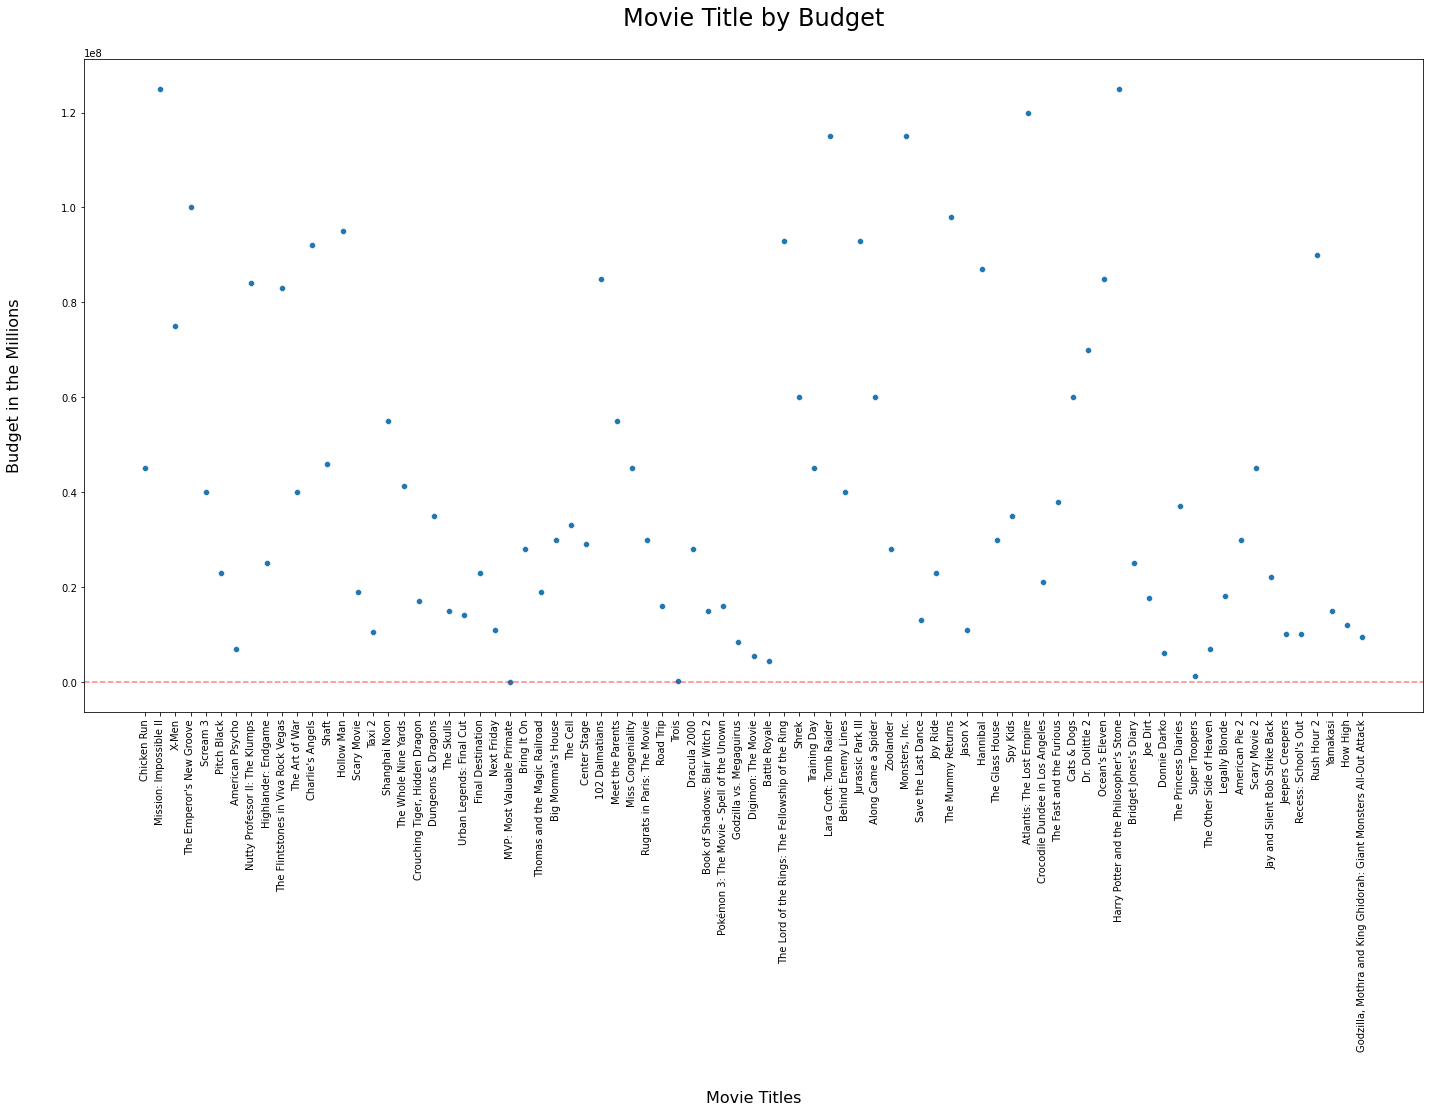

In [147]:
import seaborn as sns
import matplotlib.pyplot as plt


fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (24,12))
sns.scatterplot(data = finalyears, x = 'title' , y = 'budget')
plt.axhline(y=0, color = 'red', alpha = .5, ls = 'dashed');

plt.title('Movie Title by Budget\n', fontsize =24)
plt.ylabel('Budget in the Millions\n\n', fontsize=16);
plt.xlabel('\n\nMovie Titles', fontsize=16);
plt.xticks(rotation=90);

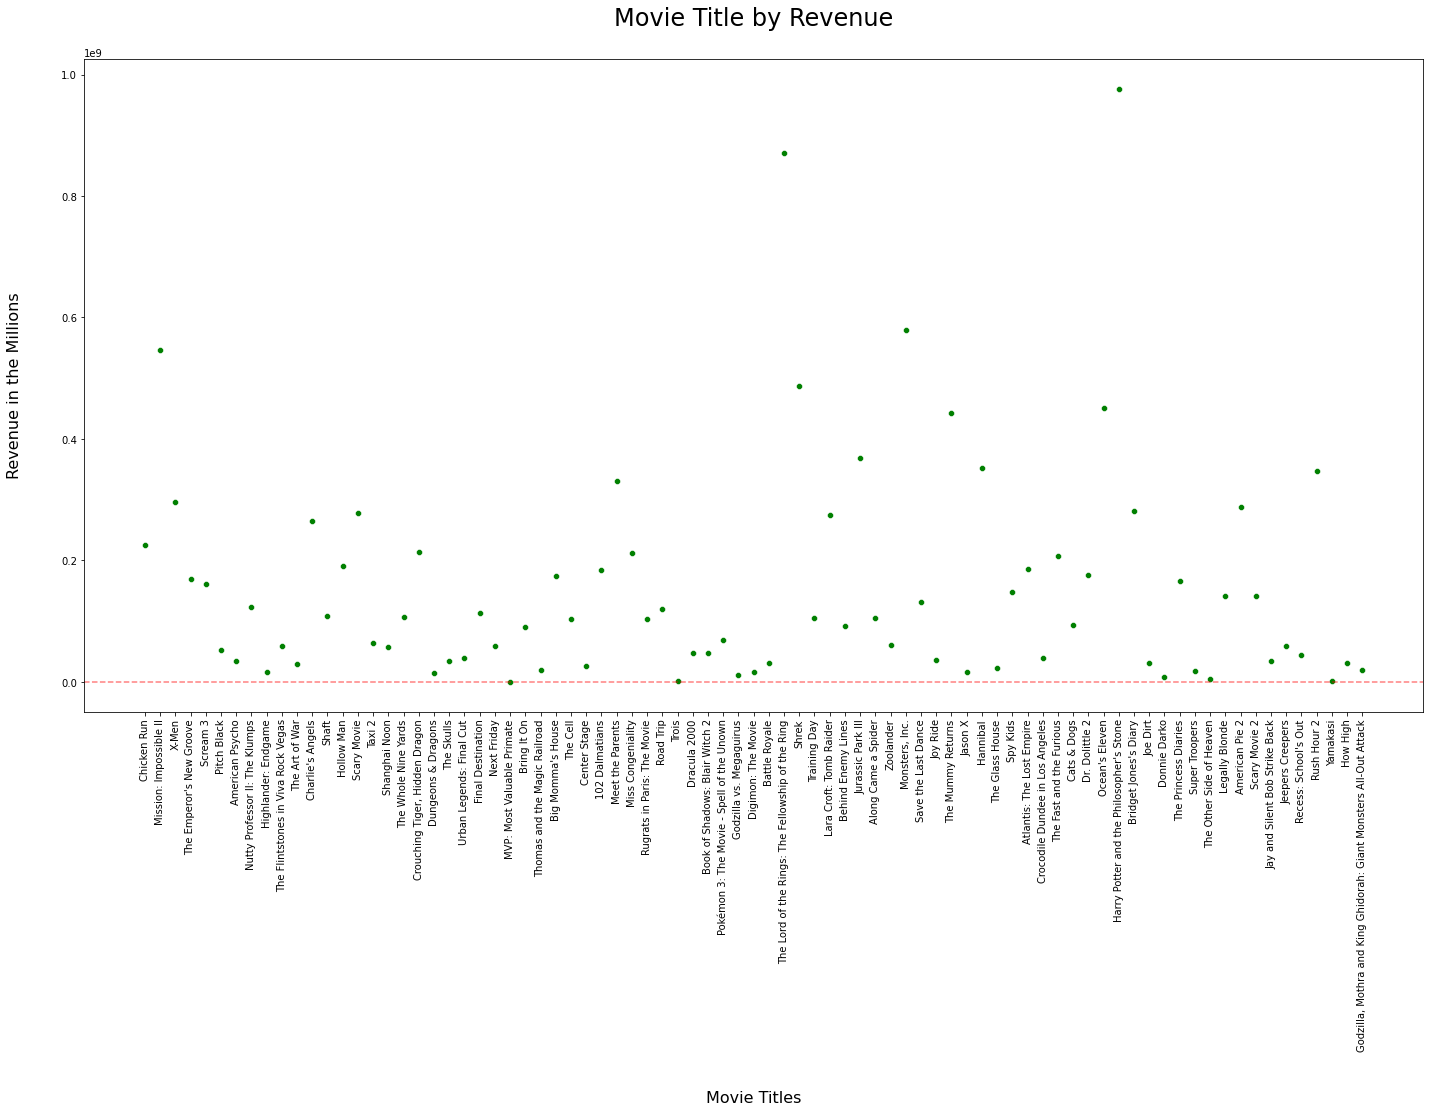

In [146]:

fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (24,12))
sns.scatterplot(data = finalyears, x = 'title' , y = 'revenue', color = 'green')
plt.axhline(y=0, color = 'red', alpha = .5, ls = 'dashed');
plt.title('Movie Title by Revenue\n', fontsize =24)
plt.ylabel('Revenue in the Millions\n\n', fontsize=16);
plt.xlabel('\n\nMovie Titles', fontsize=16);
plt.xticks(rotation=90);

## ***How many movies are there in each of the certification categories (G/PG/PG-13/R)?***

In [141]:
finalyears['certification'].replace('', 'NR', inplace = True);

C:\Users\jnate\anaconda3\envs\dojo-env\lib\site-packages\pandas\core\generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


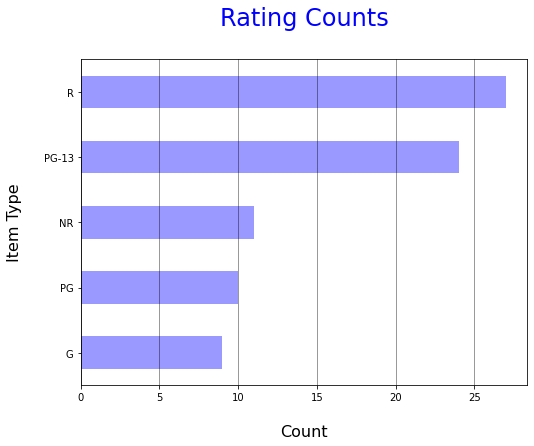

In [144]:
rating = finalyears['certification'].value_counts().sort_values(ascending=True)

rating.plot(kind='barh', alpha = .4, color='blue', figsize= (8,6), );
plt.title('Rating Counts\n', color= 'blue', fontsize =24)
plt.xlabel('\nCount', fontsize = 16)
plt.ylabel('Item Type\n', fontsize = 16)
plt.grid(axis ='x', color ='black', alpha=.5)
plt.show()

In [149]:
finalyears['certification'].value_counts()

R        27
PG-13    24
NR       11
PG       10
G         9
Name: certification, dtype: int64

### A: Movie Counts:

    R:       27
    PG-13:   24
    NR:      11
    PG:      10
    G:       9

## ***What is the average revenue per certification category?***

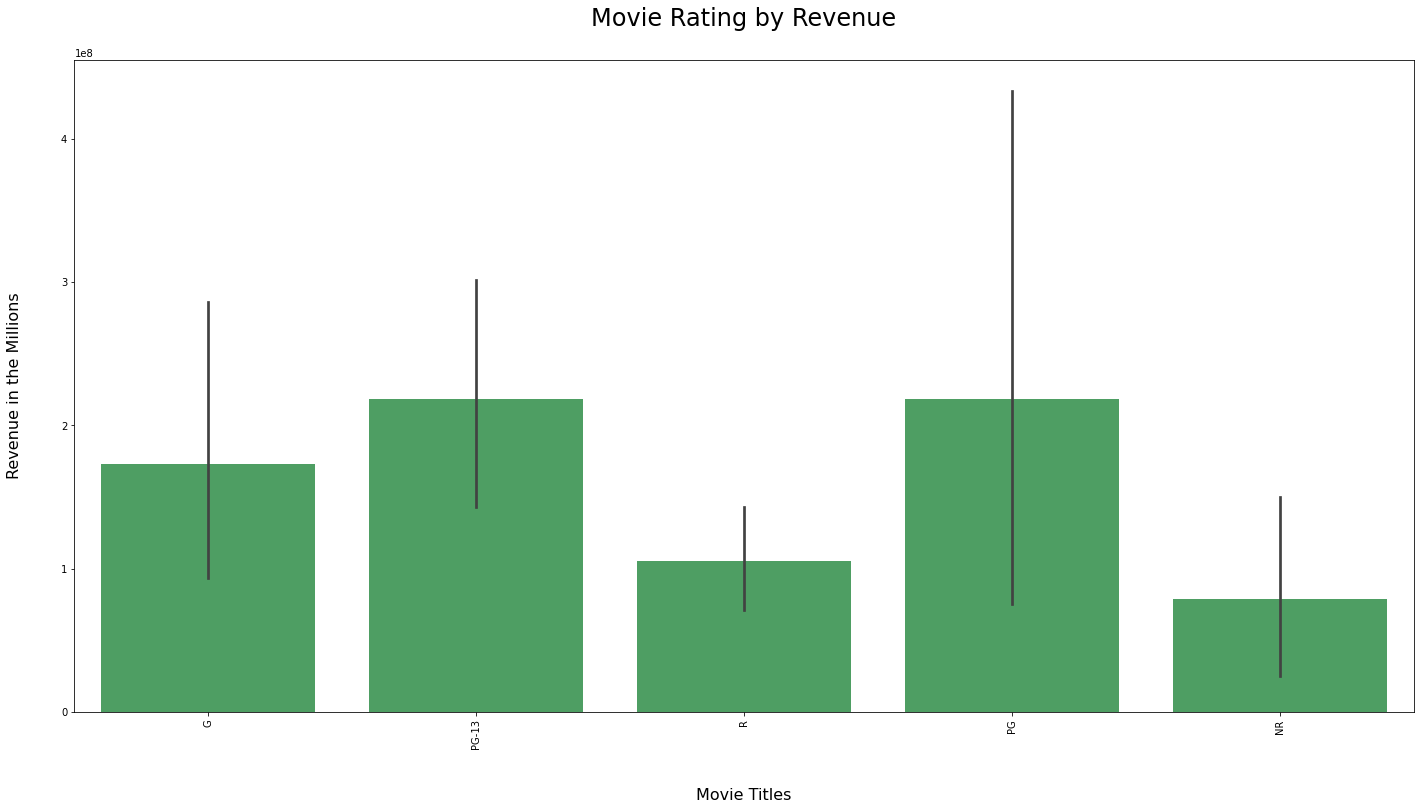

In [161]:
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (24,12))
sns.barplot(data = finalyears, x = 'certification' , y = 'revenue', color = '#41ab5d')
plt.title('Movie Rating by Revenue\n', fontsize =24)
plt.ylabel('Revenue in the Millions\n\n', fontsize=16);
plt.xlabel('\n\nMovie Titles', fontsize=16);
plt.xticks(rotation=90);

In [162]:
finalyears.groupby('certification')['revenue'].mean()

certification
G        1.731920e+08
NR       7.872080e+07
PG       2.183303e+08
PG-13    2.185753e+08
R        1.049396e+08
Name: revenue, dtype: float64

### A: Average Revenue per Category:

    G        1.731920e+08 | 173,000,000.00
    NR       7.872080e+07 | 78,700,000.00
    PG       2.183303e+08 | 218,300,000.00
    PG-13    2.185753e+08 | 218,500,000.00
    R        1.049396e+08 | 105,000,000.00

## What is the average budget per certification category?

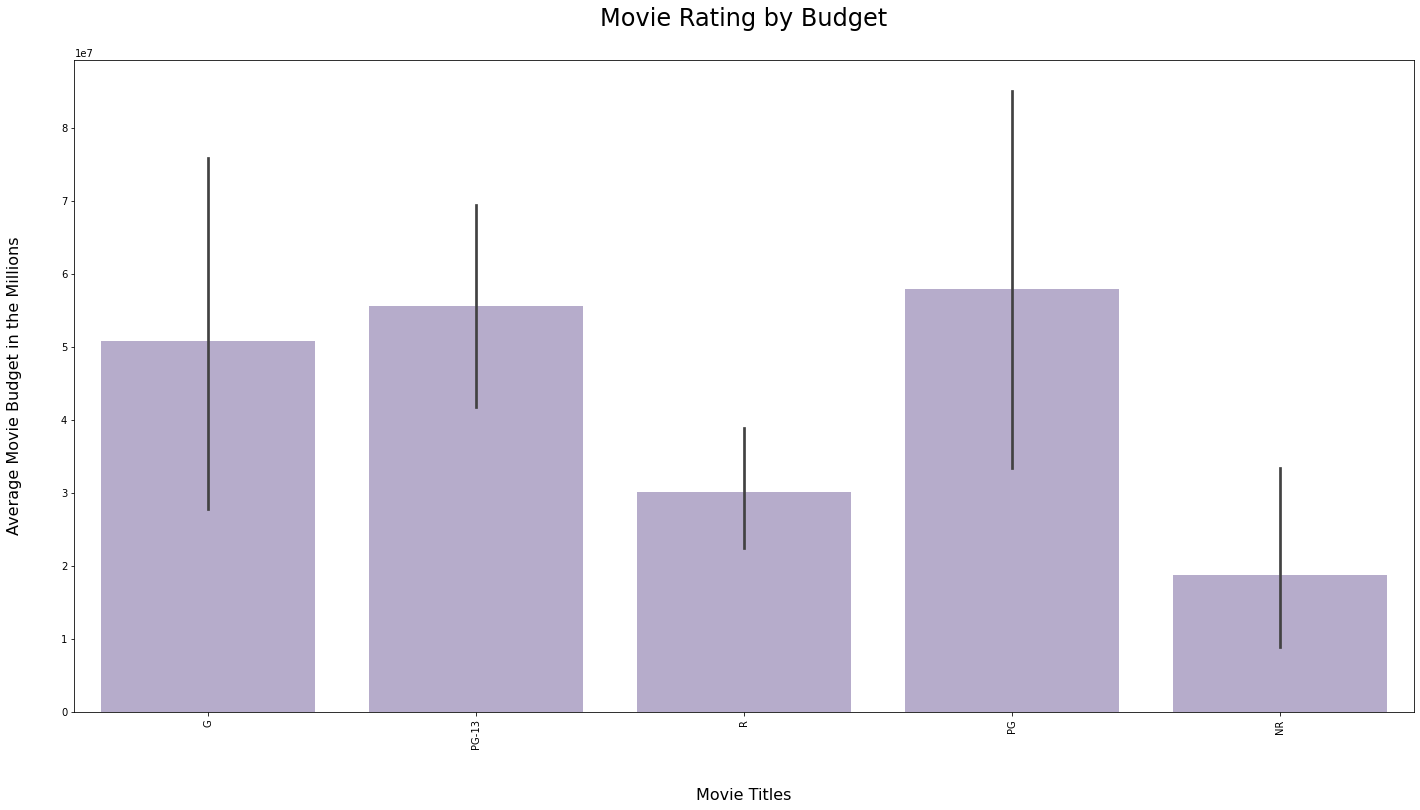

In [170]:
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (24,12))
sns.barplot(data = finalyears, x = 'certification' , y = 'budget', color = '#6a51a3', alpha = 0.5)
plt.title('Movie Rating by Budget\n', fontsize =24)
plt.ylabel('Average Movie Budget in the Millions\n\n', fontsize=16);
plt.xlabel('\n\nMovie Titles', fontsize=16);
plt.xticks(rotation=90);

In [168]:
budget = finalyears.groupby('certification')['budget'].mean()
budget

certification
G        5.077778e+07
NR       1.870000e+07
PG       5.796500e+07
PG-13    5.557083e+07
R        3.010000e+07
Name: budget, dtype: float64

### A: Average movie budget for each Rating:

    G        5.077778e+07 | 50,700,000.00
    NR       1.870000e+07 | 18,700,000.00
    PG       5.796500e+07 | 58,000,000.00
    PG-13    5.557083e+07 | 56,000,000.00
    R        3.010000e+07 | 30,000,000.00